In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [95]:
#!mkdir processed_audio_files
#!unzip '/content/drive/MyDrive/Dataset/processed_audio_files.zip' -d '/content/processed_audio_files'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import librosa as lb
import librosa.display
import soundfile as sf
import IPython.display as ipd
from sklearn.model_selection import train_test_split

In [7]:
sample_audio = '/content/processed_audio_files/content/processed_audio_files/174_2p3_Al_mc_AKGC417L_0.wav'

In [8]:
audio_arr, sr = lb.load(sample_audio)

### Basic information regarding audio files

In [14]:
# total number of samples in audio file
tot_samples = len(audio_arr)
tot_samples

132300

In [11]:
# duration in seconds of 1 sample
sample_duration = 1/sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [15]:
# duration of debussy audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 6.0 seconds


### Visualising audio signal in the time domain

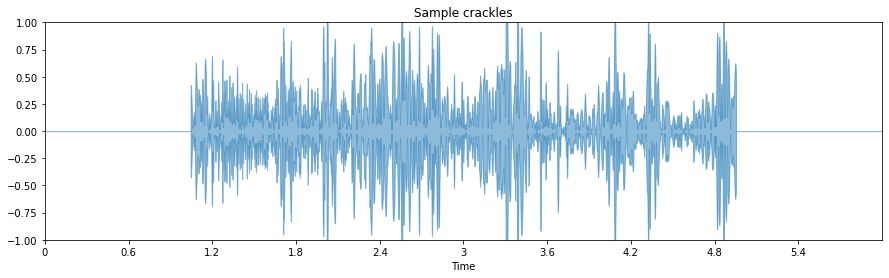

In [18]:
plt.figure(figsize=(15, 4))

librosa.display.waveplot(audio_arr, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Sample crackles")
plt.show()

### Calculating amplitude envelope

In [90]:
HOP_LENGTH = 512
FRAME_SIZE = 1024
def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope_up = []
    amplitude_envelope_down = []

    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame_up = max(signal[i:i+frame_size])
        amplitude_envelope_current_frame_down = min(signal[i:i+frame_size])

        amplitude_envelope_up.append(amplitude_envelope_current_frame_up)
        amplitude_envelope_down.append(amplitude_envelope_current_frame_down)

    amplitude_envelope_up = np.array(amplitude_envelope_up)
    amplitude_envelope_down = np.array(amplitude_envelope_down)
    
    return amplitude_envelope_up, amplitude_envelope_down

'''
NB: HOP_LENGTH close to 1 (good but more time)
    HOP_LENGTH close to len(audio_df) (bad, but less time)
'''

'\nNB: HOP_LENGTH close to 1 (good but more time)\n    HOP_LENGTH close to len(audio_df) (bad, but less time)\n'

In [91]:
ae_up, ae_down = amplitude_envelope(audio_arr, FRAME_SIZE, HOP_LENGTH)
len(ae_up)   # number of frames in amplitude envelope

259

#### Visualising amplitude envelope

In [92]:
frames = range(len(ae_audio_arr))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
len(t)

259

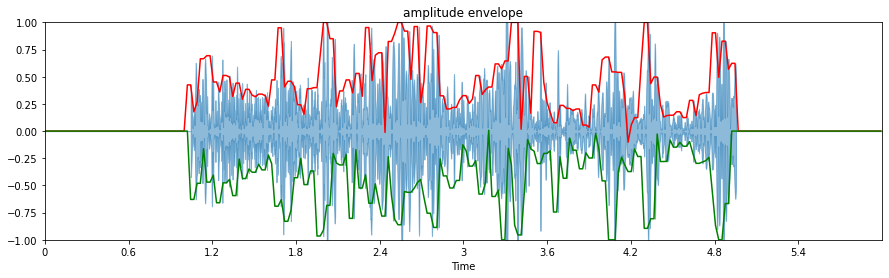

In [94]:
plt.figure(figsize=(15, 4))

librosa.display.waveplot(audio_arr, alpha=0.5)
plt.plot(t, ae_up, color="r")
plt.plot(t, ae_down, color="g")
plt.ylim((-1, 1))
plt.title("amplitude envelope")
plt.show()